Cluster analysis (example with Iris data set)

Imagine you are a biologist on a field trip characterizing flowering plants.
You measure flower sepal length and width (in cm). But oh no, somehow you lost the notes which flower belongs to which species. Is our data now completely useless?

Luckily we know about clustering and will try to use it to make sense of our data!

In [38]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [8]:
# import data
# the iris data set is part of datasets included in sklearn
# the datasets consists of multiple features, for simplicity we will focus only on sepal length and width
from sklearn import datasets

# import the dataset as a bunch object
iris = datasets.load_iris()

# Turn data into dataframe
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['Species'])

# Data preparation for clustering
# the resulting dataframe should consist only of 2 columns (sepal length and width)
# each row representing one measurement
df_clust_1 = df.drop(['Species', 'petal length (cm)', 'petal width (cm)'], axis = 1)
#df_clust_2 = df.drop(['Species', 'sepal length (cm)', 'sepal width (cm)'], axis = 1)

print(df_clust_1)

     sepal length (cm)  sepal width (cm)
0                  5.1               3.5
1                  4.9               3.0
2                  4.7               3.2
3                  4.6               3.1
4                  5.0               3.6
..                 ...               ...
145                6.7               3.0
146                6.3               2.5
147                6.5               3.0
148                6.2               3.4
149                5.9               3.0

[150 rows x 2 columns]


After digitalizing our measurements and loading the data we will investigate the data and check for
- null values
- duplicates
- data distribution


In [16]:
# Data investigation
# print data frame shape (number of rows and number of columns)
print(df_clust_1.shape)
# print column names
print(df_clust_1.columns)
# calculate summary statistics of numeric columns
print(df_clust_1.describe())

(150, 2)
Index(['sepal length (cm)', 'sepal width (cm)'], dtype='object')
       sepal length (cm)  sepal width (cm)
count         150.000000        150.000000
mean            5.843333          3.057333
std             0.828066          0.435866
min             4.300000          2.000000
25%             5.100000          2.800000
50%             5.800000          3.000000
75%             6.400000          3.300000
max             7.900000          4.400000


In [13]:
# check for missing values
miss_check = df_clust_1.isnull().sum(axis=0)
print(miss_check)

sepal length (cm)    0
sepal width (cm)     0
dtype: int64


There are no missing values in the dataset.

In [17]:
# check for duplicates
dupl_check = (df_clust_1.drop_duplicates())
print(dupl_check)

     sepal length (cm)  sepal width (cm)
0                  5.1               3.5
1                  4.9               3.0
2                  4.7               3.2
3                  4.6               3.1
4                  5.0               3.6
..                 ...               ...
136                6.3               3.4
137                6.4               3.1
138                6.0               3.0
143                6.8               3.2
148                6.2               3.4

[117 rows x 2 columns]


The number of duplicates in the dataset is to high to simply drop them. Maybe the method of measurement is not exact enough to distinguish the measurement values more in detail. Therefore we will check the data distribution of the full dataset next. If the distribution roughly follows a normal distribution we can assume that the duplicates are due to natural variability and a not detaile enough method of measurement and not due to an error caused by manual data entry. 

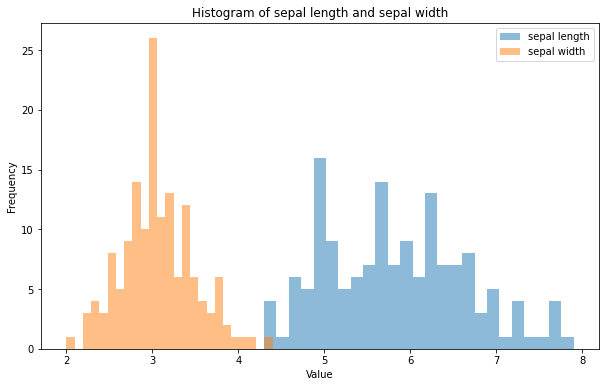

In [22]:
# Create a histogram for each numeric variable in the dataset
plt.figure(figsize=(10, 6))

plt.hist(df_clust_1['sepal length (cm)'], bins=25, alpha=0.5, label='sepal length')
plt.hist(df_clust_1['sepal width (cm)'], bins=25, alpha=0.5, label='sepal width')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of sepal length and sepal width')
plt.legend()

plt.show()

But what can we learn now about our dataset?

[]

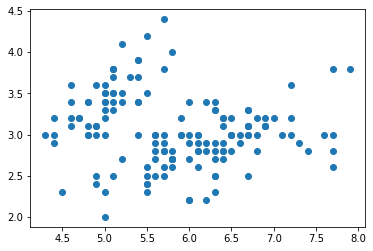

In [23]:
# Create a scatterplot with the data
plt.scatter(x = 'sepal length (cm)',
            y = 'sepal width (cm)',
            data = df_clust_1)
plt.plot()

Can we identify multiple groups in the dataset to identify muliple species?

In [24]:
# how many clusters (groups) are in the dataset?

from sklearn.cluster import KMeans

#create list to hold SSE values for each k
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k,
                    max_iter = 500,
                    random_state = 42)
    kmeans.fit(df_clust_1)
    sse.append(kmeans.inertia_)
print(sse)

c:\Users\k-bur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[130.47526666666673, 58.20409278906672, 37.05070212765957, 28.034982153246222, 20.957355867306912, 17.422960622710622, 15.071801050801051, 12.963071632030072, 11.366524172639263]


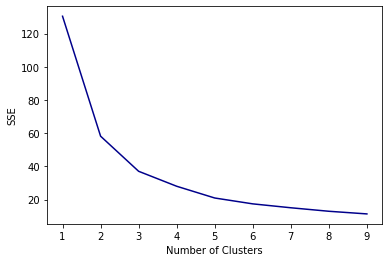

In [30]:
# Visualize elbow plot
plt.plot(range(1, 10), 
         sse,
         color = '#00008B')
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

The elbow plot suggests that we find 3 informative groups within our dataset

In [31]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", 
                n_clusters=3, 
                n_init=10, 
                random_state=42)
#fit k-means algorithm to data
kmeans.fit(df_clust_1)
#append cluster assingments to original DataFrame
df_clust_1['cluster'] = kmeans.labels_

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

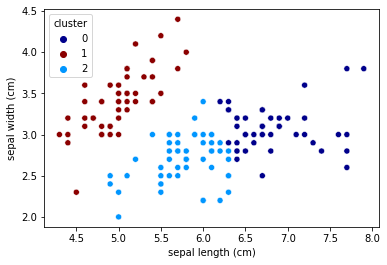

In [46]:
# Create a scatterplot with the data
sns.scatterplot(x = 'sepal length (cm)',
                y = 'sepal width (cm)',
                hue = 'cluster',
                palette = ['#00008B', '#8b0000', '#0096FF'],
                data = df_clust_1)

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

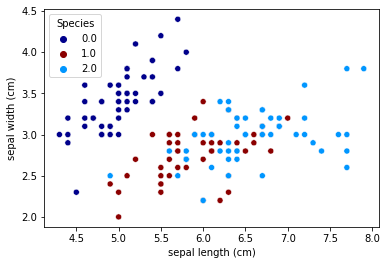

In [50]:
# Create a scatterplot with the data
sns.scatterplot(x = 'sepal length (cm)',
                y = 'sepal width (cm)',
                hue = 'Species',
                palette = ['#00008B', '#8b0000', '#0096FF'],
                data = df)

In [49]:
# final check
final_check = pd.merge(df_clust_1, df['Species'], left_index=True, right_index=True)
print(final_check)

     sepal length (cm)  sepal width (cm)  cluster  Species
0                  5.1               3.5        1      0.0
1                  4.9               3.0        1      0.0
2                  4.7               3.2        1      0.0
3                  4.6               3.1        1      0.0
4                  5.0               3.6        1      0.0
..                 ...               ...      ...      ...
145                6.7               3.0        0      2.0
146                6.3               2.5        2      2.0
147                6.5               3.0        0      2.0
148                6.2               3.4        0      2.0
149                5.9               3.0        2      2.0

[150 rows x 4 columns]


In [47]:
# how many clusters (groups) are in the dataset?

from sklearn.cluster import KMeans

#create list to hold SSE values for each k
sse_2 = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k,
                    max_iter = 500,
                    random_state = 42)
    kmeans.fit(df_clust_2)
    sse_2.append(kmeans.inertia_)
print(sse_2)

NameError: name 'df_clust_2' is not defined

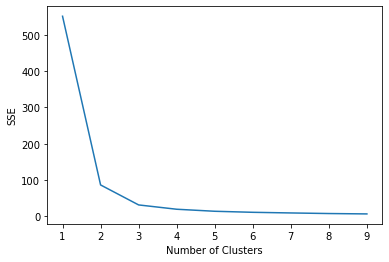

In [52]:
# Visualize elbow plot
plt.plot(range(1, 10), sse_2)
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [53]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=3, n_init=10, random_state=42)
#fit k-means algorithm to data
kmeans.fit(df_clust_2)
#append cluster assingments to original DataFrame
df_clust_2['cluster'] = kmeans.labels_

NameError: name 'df_clust_2' is not defined

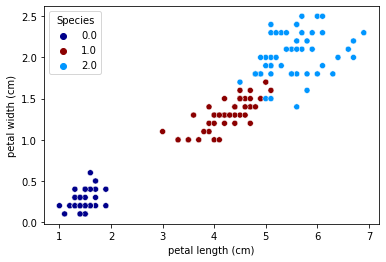

In [51]:
# Create a scatterplot with the data
sns.scatterplot(x = 'petal length (cm)',
                y = 'petal width (cm)',
                hue = 'Species',
                palette = ['#00008B', '#8b0000', '#0096FF'],
                data = df)

plt.scatter(x = 'petal length (cm)',
            y = 'petal width (cm)',
            c = 'cluster',
            data = df_clust_2)
